In [132]:
# Importing required libraries
import hdbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import umap
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.cluster import KMeans



In [133]:
class Digits:
    
    def __init__(self, dataset_name):
        self.datset_name = dataset_name
        
    def load_dataset(self, dataset_name):
        if dataset_name == "digits":
            digits = load_digits()
            X = digits.data
            y = digits.target
            return X,y
        
    def reduce_dimensions(self, n):
        x,y = self.load_dataset('digits')
        pca = PCA(n) # we need 24 principal components.
        x = pca.fit_transform(x)
        return x.shape
    
    def get_embedding(self):
        x,y = self.load_dataset('digits')
        reducer = umap.UMAP(random_state=42)
        reducer.fit(x)
        embedding = reducer.transform(x)
        assert(np.all(embedding == reducer.embedding_))
        return embedding, embedding.shape
    
    def plot_embedding(self, our_embed):
        x,y = self.load_dataset('digits')
        our_embed,sh = self.get_embedding()
        plt.scatter(our_embed[:, 0], our_embed[:, 1], c=y, cmap='Spectral', s=5)
        plt.gca().set_aspect('equal', 'datalim')
        plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
        plt.title('UMAP projection of the Digits dataset', fontsize=24);
        
    def get_cluster_attributes(self, our_embed):
        clusterer = hdbscan.HDBSCAN()
        our_embed, sh = self.get_embedding()
        clusterer.fit(our_embed)
        return clusterer, clusterer.labels_, clusterer.probabilities_

    def get_cluster_plot(self, our_embed):
        our_embed, sh = self.get_embedding()
        x,y = self.load_dataset('digits')
        cluster, labels, scores = self.get_cluster_attributes(our_embed)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(our_embed)
        color_palette = sns.color_palette('deep',50)
        cluster_colors = [color_palette[x] if x >= 0
                          else (0.5, 0.5, 0.5)
                          for x in labels]
        cluster_member_colors = [sns.desaturate(x, p) for x, p in
                                 zip(cluster_colors, clusterer.probabilities_)]
        plt.scatter(*e.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
        
    def get_outliers_plot(self, our_embed, c_scores):
        our_embed, sh = self.get_embedding()
        cluster, labels, c_scores = self.get_cluster_attributes(our_embed) 
        mask_outliers = (c_scores < 0.3)
        mask_inliers = ~mask_outliers
        plt.scatter(e[mask_inliers, 0], e[mask_inliers, 1], c= 'g', label='inliner')
        plt.scatter(e[mask_outliers, 0], e[mask_outliers, 1], c= 'r', label='outliers')
        plt.legend()
    
    def clustering_k_means(self, our_embed, n_clusters):
        our_embed, sh = self.get_embedding()
        X_kmeans = KMeans(n_clusters)
        X_kmeans.fit(our_embed)
        lab = X_kmeans.predict(our_embed)
        centroids = X_kmeans.cluster_centers_
        plt.scatter(our_embed[:, 0], our_embed[:, 1], c=lab, cmap = 'rainbow')
        plt.show()
        
    def elbow_plot(self,n_clusters):
        our_embed, sh = self.get_embedding()
        K = range(1,15)
        sum_of_squared_distances = []
        for k in K:
            model = KMeans(n_clusters=k).fit(our_embed)
            sum_of_squared_distances.append(model.inertia_)
        plt.plot(K, sum_of_squared_distances, 'bx-')
        plt.xlabel('K values')
        plt.ylabel('Sum of Squared Distances')
        plt.title('Elbow Method')
        plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


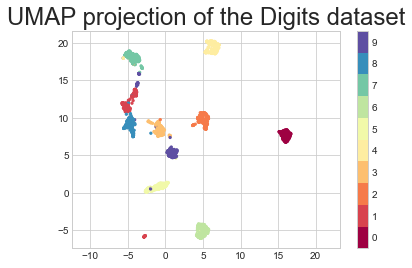

In [138]:
d = Digits('digits')
x,y = d.load_dataset('digits')
reduced_shape_of_x = d.reduce_dimensions(24)
e,s = d.get_embedding()
plot_embedding(e)

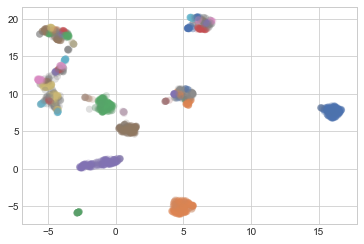

In [140]:
c,l,s = d.get_cluster_attributes(e)
d.get_cluster_plot(e)


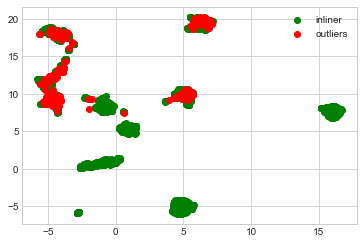

In [141]:
d.get_outliers_plot(e,s)


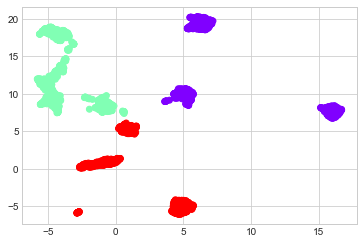

In [142]:
d.clustering_k_means(e,3)

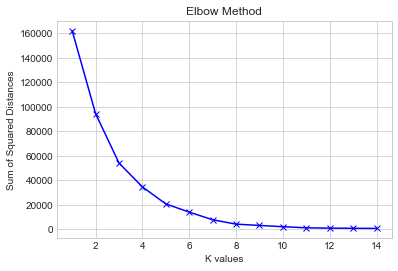

In [144]:
d.elbow_plot(3)